# Problem Statement

3. A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year. 

Dataset: Plastic Sales.csv

# Business Objective: 

1. Predict Future Sales: Forecast next year's sales based on historical data (1949-1953).
2. Optimize Production and Inventory: Align production schedules with predicted demand.
3. Strategic Decision Making: Inform decisions on product expansion or market targeting.
4. Maximize Profitability: Adjust production to avoid overproduction or stockouts.


# Business Constraints:

1. Data Quality: Inaccurate or missing data could impact forecasting.
2. External Factors: Changes in market conditions or seasonality might affect sales.
3. Model Accuracy: Different models have varying accuracy; choosing the right one is key.
4. Business Limitations: Limited resources for scaling production based on forecast.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("PlasticSales.csv")
df.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


# Data Exploration

In [3]:
df.shape

(60, 2)

In [4]:
df.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [7]:

df.columns

Index(['Month', 'Sales'], dtype='object')

In [8]:
df.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [9]:
import pandas as pd

# Load the CSV
df = pd.read_csv("PlasticSales.csv")

# Rename the first column to 'Month' if it's unnamed
if 'Month' not in df.columns:
    df.rename(columns={df.columns[0]: 'Month'}, inplace=True)

# Convert Month column to datetime (assume all years are 1900s)
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

# Manually fix year if > 2025 (assuming the original data starts in 1949)
df['Month'] = df['Month'].apply(lambda x: x.replace(year=x.year - 100) if x.year > 2025 else x)

# Set Month as index
df.set_index('Month', inplace=True)

# Preview result
print(df.head())
print(df.index.min())


            Sales
Month            
1949-01-01    742
1949-02-01    697
1949-03-01    776
1949-04-01    898
1949-05-01   1030
1949-01-01 00:00:00


In [10]:
# Step 3: Check it's working
print(df.head())
print(df.index.min())  # Should be 1950-01-01


            Sales
Month            
1949-01-01    742
1949-02-01    697
1949-03-01    776
1949-04-01    898
1949-05-01   1030
1949-01-01 00:00:00


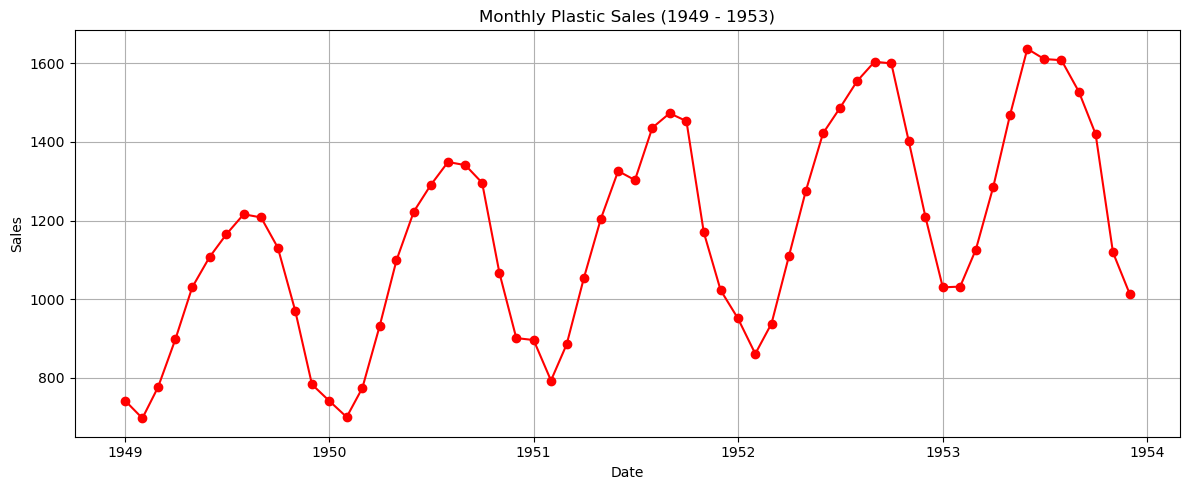

In [11]:
# Plot the sales trend
plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], marker='o',color='Red')
plt.title('Monthly Plastic Sales (1949 - 1953)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df.index.min()  # This should show Timestamp('1950-01-01')


Timestamp('1949-01-01 00:00:00')

In [13]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df['Sales'])
adf_result_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Used Lag': adf_result[2],
    'Number of Observations': adf_result[3],
    'Critical Values': adf_result[4]
}

adf_result_output

{'ADF Statistic': -0.7425639844129008,
 'p-value': 0.8354143931554416,
 'Used Lag': 10,
 'Number of Observations': 49,
 'Critical Values': {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153}}

In [14]:
# First-order differencing
df_diff = df['Sales'].diff().dropna()

In [15]:
# ADF test on differenced data
adf_result_diff = adfuller(df_diff)
adf_result_diff_output = {
    'ADF Statistic': adf_result_diff[0],
    'p-value': adf_result_diff[1],
    'Used Lag': adf_result_diff[2],
    'Number of Observations': adf_result_diff[3],
    'Critical Values': adf_result_diff[4]
}

adf_result_diff_output

{'ADF Statistic': -1.11838433115413,
 'p-value': 0.7076850425725221,
 'Used Lag': 11,
 'Number of Observations': 47,
 'Critical Values': {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064}}

 # SARIMA Model


# Step 5.1: Identify SARIMA Parameters

# Step 5.2: Fit SARIMA Model

In [16]:
# Split train-test (last 12 months for testing)
train = df.iloc[:-12]
test = df.iloc[-12:]

In [17]:
# Fit SARIMA(1,1,1)(1,1,1,12)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)


In [18]:
# Forecast
forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

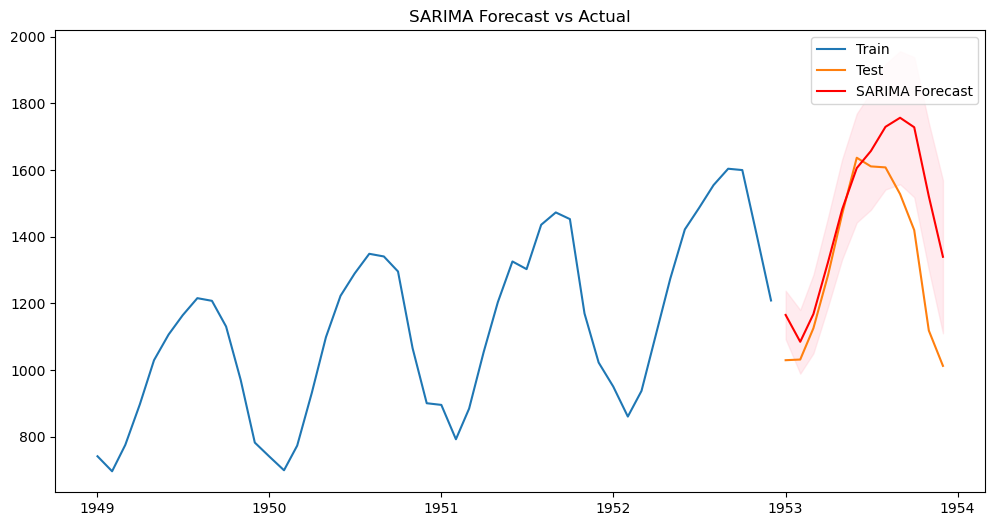

In [19]:
# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predicted_mean.index, predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(confidence_intervals.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

# Step 5.3: Evaluate SARIMA

In [20]:
# Calculate MAE and RMSE
mae = mean_absolute_error(test, predicted_mean)
rmse = np.sqrt(mean_squared_error(test, predicted_mean))
print(f'SARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}')

SARIMA MAE: 145.83, RMSE: 195.57


In [21]:
# Refit SARIMA on full data
final_model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12))
final_results = final_model.fit(disp=False)


In [22]:
# Forecast 1954
forecast_1954 = final_results.get_forecast(steps=12)
forecast_values = forecast_1954.predicted_mean


In [23]:
print("1954 Forecasted Sales:")
print(forecast_values)

1954 Forecasted Sales:
1954-01-01     905.104536
1954-02-01     878.411645
1954-03-01     944.960224
1954-04-01    1119.255934
1954-05-01    1263.623792
1954-06-01    1416.365978
1954-07-01    1416.969913
1954-08-01    1485.492616
1954-09-01    1451.296707
1954-10-01    1408.427369
1954-11-01    1145.667836
1954-12-01    1013.044489
Freq: MS, Name: predicted_mean, dtype: float64
